# Python Assignment 2

- Name: Chai Pin Zheng

- Admission No: P2026338

- Teacher: Wilson Qiu ZiXuan

- Class: EL/EP0302/FT/02

## Introduction
In this report, I'll be using 5 government datasets to analyze if a more educated population is causative to a more productive and profitable economy? And are there any consequences?
- live-births.csv, https://data.gov.sg/dataset/births-and-fertility-annual
- government-expenditure-on-education.csv, https://data.gov.sg/dataset/government-expenditure-on-education
- total-fertility-rate-and-reproduction-rate.csv, https://data.gov.sg/dataset/births-and-fertility-annual?resource_id=f63d5535-f094-42d0-b7ff-dbcbccb97928
- per-capita-gni-and-per-capita-gdp-at-current-prices-annual.csv, https://data.gov.sg/dataset/per-capita-gni-and-per-capita-gdp-at-current-market-prices-annual
- graduates-from-university-first-degree-courses-by-type-of-course.csv, https://data.gov.sg/dataset/graduates-from-university-first-degree-courses-by-type-of-course

---
But, before I began working on these datasets, I wanted to learn more about how and what Singapore economy was transformed and the effects of it. With independence came bleak, if not precarious economic prospects. According to Barbara Leitch Lepoer, the editor of Singapore: A Country Study (1989): “Separation from Malaysia meant the loss of Singapore’s economic hinterland, and Indonesia’s policy of military confrontation directed at Singapore and Malaysia had dried up the entrepot from that direction.” According to the same book, Singapore also faced the loss of 20 per cent of its jobs with the announcement of Britain’s departure from the island’s military bases in 1968.

Instead of demoralising Singapore, these problems motivated Singapore’s leadership to focus on the nation’s economy. With Cambridge-educated lawyer Lee Kuan Yew at its helm, the Singaporean government was aggressive in promoting export-oriented, labor-extensive industrialisation through a program of incentives to attract foreign investment. After all, Singapore still had its strategic location to its advantage.

By late 1970s, the government changed its strategic focus to skill and technology-intensive, high value-added industries and away from labor-intensive manufacturing. In particular, information technology was given priority for expansion and Singapore became the world’s largest producer of disk drives and disk drive parts in 1989. In the same year, 30 per cent of the country’s GDP was due to earnings from manufacturing.

Singapore’s international and financial services sector was and still is one of the fastest growing sectors of its economy accounting for nearly 25 per cent of the country’s GDP in the late 1980s. In the same year, Singapore ranked alongside Hong Kong as the two most important Asian financial centers after Tokyo. By 1990, Singapore was playing host to more than 650 multinational companies and several thousand financial institutions and trading firms. On the political front, Goh Chok Tong succeeded Lee Kuan Yew in 1990 and in 2004, Lee Hsien Loong, the eldest son of Lee Kuan Yew, became Singapore’s third prime minister.


![black-divider](https://www.belaroundtheworld.com/wp-content/uploads/2017/08/singapore-river-old-vs-new.jpg)

As such, the many questions were raised. How did Singapore managed to overturn its economy in less than a century? What caused Singapore to be so successful and join the Asian Tigers? What were the factors that came into play? But more importantly, has these success benefit the population of Singapore and the consequences of it?

As a result, in this journal report, we will investigate the datasets to fully understand Singapore birth rates and its consequences of it.

## Import relevant Libraries

---

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, Markdown, Latex
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline


## Reading the Data

---

As all of the data files are in `.csv` format, I will import the data using the 'Numpy.genfromtxt' method.

In [2]:
# live-births
live_birth = pd.read_csv('./data/live-births.csv', sep=",", na_values=['na'])
# government-expenditure-on-education
government_expenditure_on_education = pd.read_csv('./data/government-expenditure-on-education.csv', sep=",", na_values=['na'])
# Government Recurrent Expenditure On Education
government_recurrent_expenditure_on_education_by_type = pd.read_csv('./data/government-recurrent-expenditure-on-education-by-type-of-educational-institutions.csv', sep=",", na_values=['na'])
# total-fertility-rate-and-reproduction-rate
total_fertility_rate_and_reproduction_rate = pd.read_csv('./data/total-fertility-rate-and-reproduction-rate.csv', sep=",", na_values=['na'])
# graduates-from-university-first-degree-courses-by-type-of-course
graduates_from_university_first_degree_courses = pd.read_csv('./data/graduates-from-university-first-degree-courses-by-type-of-course.csv', sep=",", na_values=['na'])
# per-capita-gni-and-per-capita-gdp-at-current-prices-annual
per_capita_gni_and_per_capita_gdp_at_current_prices_annual = pd.read_csv('./data/per-capita-gni-and-per-capita-gdp-at-current-prices-annual.csv', sep=",", na_values=['na'])
# percentage-of-p1-cohort-that-progressed-to-post-secondary-education
percentage_of_p1_cohort_that_progressed_to_post_secondary_education = pd.read_csv('./data/percentage-of-p1-cohort-that-progressed-to-post-secondary-education.csv', sep=",", na_values=['na'])
# literacy-rate-annual
literacy_rate_annual = pd.read_csv('./data/literacy-rate-annual.csv', sep=",", na_values=['na'])

## Cleaning the data + text-based analysis

---

We will drop any rows that have fields that contain `empty` values. This is to ensure that when plotting, there will be no major issues

- Analysis of "live-births.csv"

In [3]:
# live_birth_cleaned = live_birth.dropna()
live_birth_cleaned = live_birth
live_birth_cleaned['year'] = pd.to_datetime(live_birth_cleaned['year'], format='%Y')
live_birth_cleaned.set_index('year', inplace=True)
live_birth_cleaned = live_birth.pivot(columns='level_1', values='value', index=None)


In [4]:
total_rows = live_birth_cleaned['Total Live-births'].count() + 1
live_birth_cleaned_years = live_birth_cleaned.index
column = live_birth_cleaned.columns

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column) + 1} columns in this dataset.
- There are {len(np.unique(live_birth_cleaned_years))} years of data captured from **{live_birth_cleaned_years[0]}** to **{live_birth_cleaned_years[-1]}**


***Within the {len(column) + 1} columns, the datatypes are:***
---
---

| Column | Date Type |
| --- | --- |
| {live_birth_cleaned.index.name} | {live_birth_cleaned.index.dtype} |
| {live_birth_cleaned.columns[0]} | {live_birth_cleaned[live_birth_cleaned.columns[0]].dtype} |
| {live_birth_cleaned.columns[1]} | {live_birth_cleaned[live_birth_cleaned.columns[1]].dtype} |


***Descriptive Statistics (cleaned):***
---
---
'''), live_birth_cleaned.describe(include="all").T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))



***Within this .csv:***
---  
---
- There are exactly 60 rows, 3 columns in this dataset.
- There are 59 years of data captured from **1960-01-01 00:00:00** to **2018-01-01 00:00:00**


***Within the 3 columns, the datatypes are:***
---
---

| Column | Date Type |
| --- | --- |
| year | datetime64[ns] |
| Resident Live-births | float64 |
| Total Live-births | float64 |


***Descriptive Statistics (cleaned):***
---
---


,count,mean,std,min,25%,50%,75%,max
level_1,,,,,,,,
Resident Live-births,39.000000,40763.487179,4885.854242,35040.000000,36900.000000,39300.000000,45060.500000,51537.000000
Total Live-births,59.000000,45152.305085,6402.805202,37174.000000,39887.000000,42783.000000,48874.500000,61775.000000


- Analysis of "total-fertility-rate-and-reproduction-rate.csv"

---

In [5]:
total_fertility_rate_and_reproduction_rate_cleaned = total_fertility_rate_and_reproduction_rate
total_fertility_rate_and_reproduction_rate_cleaned['year'] = pd.to_datetime(
    total_fertility_rate_and_reproduction_rate_cleaned['year'], format='%Y')
total_fertility_rate_and_reproduction_rate_cleaned.set_index('year', inplace=True)
total_fertility_rate_and_reproduction_rate_cleaned = total_fertility_rate_and_reproduction_rate_cleaned.pivot(columns='level_1', values='value', index=None)


In [6]:
total_rows = total_fertility_rate_and_reproduction_rate_cleaned['Gross Reproduction Rate'].count(
) + 1
total_fertility_rate_and_reproduction_rate_cleaned_years = total_fertility_rate_and_reproduction_rate_cleaned.index
column = total_fertility_rate_and_reproduction_rate_cleaned.columns

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column) + 1} columns in this dataset.
- There are {len(np.unique(total_fertility_rate_and_reproduction_rate_cleaned_years))} years of data captured from **{total_fertility_rate_and_reproduction_rate_cleaned_years[0]}** to **{total_fertility_rate_and_reproduction_rate_cleaned_years[-1]}**


***Within the {len(column) + 1} columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| {live_birth_cleaned.index.name} | {live_birth_cleaned.index.dtype} |
| {total_fertility_rate_and_reproduction_rate_cleaned.columns[0]} | {total_fertility_rate_and_reproduction_rate_cleaned[total_fertility_rate_and_reproduction_rate_cleaned.columns[0]].dtype} |
| {total_fertility_rate_and_reproduction_rate_cleaned.columns[1]} | {total_fertility_rate_and_reproduction_rate_cleaned[total_fertility_rate_and_reproduction_rate_cleaned.columns[1]].dtype} |
| {total_fertility_rate_and_reproduction_rate_cleaned.columns[2]} | {total_fertility_rate_and_reproduction_rate_cleaned[total_fertility_rate_and_reproduction_rate_cleaned.columns[2]].dtype} |


***Descriptive Statistics (cleaned):***
---
---
'''), total_fertility_rate_and_reproduction_rate_cleaned.describe(include="all").T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))



***Within this .csv:***
---  
---
- There are exactly 60 rows, 4 columns in this dataset.
- There are 59 years of data captured from **1960-01-01 00:00:00** to **2018-01-01 00:00:00**


***Within the 4 columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| year | datetime64[ns] |
| Gross Reproduction Rate | float64 |
| Net Reproduction Rate | float64 |
| Total Fertility Rate | float64 |


***Descriptive Statistics (cleaned):***
---
---


,count,mean,std,min,25%,50%,75%,max
level_1,,,,,,,,
Gross Reproduction Rate,59.000000,1.048136,0.609331,0.560000,0.620000,0.830000,1.075000,2.780000
Net Reproduction Rate,59.000000,1.003390,0.541255,0.550000,0.620000,0.820000,1.035000,2.540000
Total Fertility Rate,59.000000,2.165424,1.251469,1.140000,1.290000,1.710000,2.230000,5.760000


- Analysis of "government-expenditure-on-education.csv"

---

In [7]:
government_expenditure_on_education_cleaned = government_expenditure_on_education
government_expenditure_on_education_cleaned['year'] = pd.to_datetime(government_expenditure_on_education_cleaned['year'], format='%Y')
government_expenditure_on_education_cleaned.set_index('year', inplace=True)


In [8]:
column = government_expenditure_on_education_cleaned.columns
total_rows = government_expenditure_on_education_cleaned['recurrent_expenditure_total'].count(
) + 1
government_expenditure_on_education_cleaned_years = government_expenditure_on_education_cleaned.index

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column) + 1} columns in this dataset.
- There are {len(np.unique(government_expenditure_on_education_cleaned_years))} years of data captured from **{government_expenditure_on_education_cleaned_years[0]}** to **{government_expenditure_on_education_cleaned_years[-1]}**


***Within the {len(column) + 1} columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| {government_expenditure_on_education_cleaned.index.name} | {government_expenditure_on_education_cleaned.index.dtype} |
| {government_expenditure_on_education_cleaned.columns[0]} | {government_expenditure_on_education_cleaned[government_expenditure_on_education_cleaned.columns[0]].dtype} |


***Descriptive Statistics (cleaned):***
---
---
'''), government_expenditure_on_education_cleaned.describe(include="all").T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))



***Within this .csv:***
---  
---
- There are exactly 40 rows, 2 columns in this dataset.
- There are 39 years of data captured from **1981-01-01 00:00:00** to **2019-01-01 00:00:00**


***Within the 2 columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| year | datetime64[ns] |
| recurrent_expenditure_total | int64 |


***Descriptive Statistics (cleaned):***
---
---


,count,mean,std,min,25%,50%,75%,max
recurrent_expenditure_total,39.000000,5239350.153846,3867411.749561,712732.000000,1918850.000000,4276896.000000,8418309.000000,12429006.000000


- Analysis of "graduates-from-university-first-degree-courses-by-type-of-course.csv"

---

In [9]:
graduates_from_university_first_degree_courses_cleaned = graduates_from_university_first_degree_courses
graduates_from_university_first_degree_courses_cleaned['year'] = pd.to_datetime(graduates_from_university_first_degree_courses_cleaned['year'], format='%Y')
graduates_from_university_first_degree_courses_cleaned.set_index('year', inplace=True)


In [10]:
column = graduates_from_university_first_degree_courses_cleaned.columns
total_rows = graduates_from_university_first_degree_courses_cleaned['sex'].count() + 1
graduates_from_university_first_degree_courses_cleaned_years = graduates_from_university_first_degree_courses_cleaned.index

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column) + 1} columns in this dataset.
- There are {len(np.unique(graduates_from_university_first_degree_courses_cleaned_years))} years of data captured from **{graduates_from_university_first_degree_courses_cleaned_years[0]}** to **{graduates_from_university_first_degree_courses_cleaned_years[-1]}**


***Within the {len(column) + 1} columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| {graduates_from_university_first_degree_courses_cleaned.index.name} | {graduates_from_university_first_degree_courses_cleaned.index.dtype} |
| {graduates_from_university_first_degree_courses_cleaned.columns[0]} | {graduates_from_university_first_degree_courses_cleaned[graduates_from_university_first_degree_courses_cleaned.columns[0]].dtype} |
| {graduates_from_university_first_degree_courses_cleaned.columns[1]} | {graduates_from_university_first_degree_courses_cleaned[graduates_from_university_first_degree_courses_cleaned.columns[1]].dtype} |
| {graduates_from_university_first_degree_courses_cleaned.columns[2]} | {graduates_from_university_first_degree_courses_cleaned[graduates_from_university_first_degree_courses_cleaned.columns[2]].dtype} |


***Descriptive Statistics (cleaned):***
---
---
'''), graduates_from_university_first_degree_courses_cleaned.describe(include="all").T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))



***Within this .csv:***
---  
---
- There are exactly 661 rows, 4 columns in this dataset.
- There are 22 years of data captured from **1993-01-01 00:00:00** to **2014-01-01 00:00:00**


***Within the 4 columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| year | datetime64[ns] |
| sex | object |
| type_of_course | object |
| no_of_graduates | float64 |


***Descriptive Statistics (cleaned):***
---
---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sex,660,2,Females,330,nan,nan,nan,nan,nan,nan,nan
type_of_course,660,15,Applied Arts,44,nan,nan,nan,nan,nan,nan,nan
no_of_graduates,600.000000,nan,nan,nan,394.986667,562.393030,0.000000,73.000000,178.500000,484.000000,3371.000000


- "per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.csv"

---

In [11]:
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned = per_capita_gni_and_per_capita_gdp_at_current_prices_annual
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned['year'] = pd.to_datetime(
    per_capita_gni_and_per_capita_gdp_at_current_prices_annual['year'], format='%Y')
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.set_index(
    'year', inplace=True)
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned = per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.pivot(
    columns='level_1', values='value', index=None)


In [12]:
column = per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns
total_rows = per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned['Per Capita GDP'].count(
) + 1
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned_years = graduates_from_university_first_degree_courses_cleaned.index

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column) + 1} columns in this dataset.
- There are {len(np.unique(per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned_years))} years of data captured from **{per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned_years[0]}** to **{per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned_years[-1]}**


***Within the {len(column) + 1} columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.index.name} | {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.index.dtype} |
| {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns[0]} | {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned[per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns[0]].dtype} |
| {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns[1]} | {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned[per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns[1]].dtype} |


***Descriptive Statistics (cleaned):***
---
---
'''), graduates_from_university_first_degree_courses_cleaned.describe(include="all").T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))



***Within this .csv:***
---  
---
- There are exactly 60 rows, 3 columns in this dataset.
- There are 22 years of data captured from **1993-01-01 00:00:00** to **2014-01-01 00:00:00**


***Within the 3 columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| year | datetime64[ns] |
| Per Capita GDP | int64 |
| Per Capita GNI | int64 |


***Descriptive Statistics (cleaned):***
---
---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sex,660,2,Females,330,nan,nan,nan,nan,nan,nan,nan
type_of_course,660,15,Applied Arts,44,nan,nan,nan,nan,nan,nan,nan
no_of_graduates,600.000000,nan,nan,nan,394.986667,562.393030,0.000000,73.000000,178.500000,484.000000,3371.000000


In [13]:
government_recurrent_expenditure_on_education_by_type_cleaned = government_recurrent_expenditure_on_education_by_type
government_recurrent_expenditure_on_education_by_type_cleaned['year'] = pd.to_datetime(
    government_recurrent_expenditure_on_education_by_type_cleaned['year'], format='%Y')
government_recurrent_expenditure_on_education_by_type_cleaned.set_index(
    'year', inplace=True)


In [14]:
percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned = percentage_of_p1_cohort_that_progressed_to_post_secondary_education

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Plotting the Data

---

All of the data will be plotted using matplotlib and seaborn for visualisation

# Since our thesis statement is finding if a more educated population is causative to a more productive and profitable economy, we first need to find out the government initatives to cultivate an educated population.

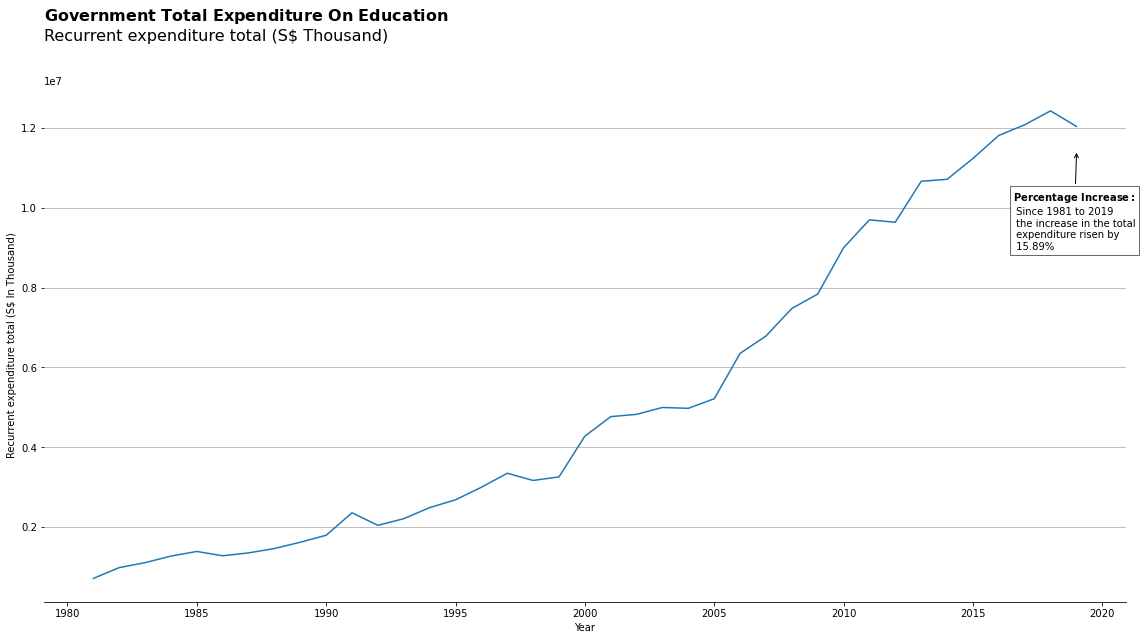

In [15]:
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)

# Pre-processing the data
x = government_expenditure_on_education_cleaned.index
y = government_expenditure_on_education_cleaned['recurrent_expenditure_total']
data = pd.DataFrame([x, y])
percentage_change = (government_expenditure_on_education_cleaned['recurrent_expenditure_total'][-1] - government_expenditure_on_education_cleaned['recurrent_expenditure_total'][0]) / (
    government_expenditure_on_education_cleaned['recurrent_expenditure_total'][0])

# Plotting
sns.lineplot(data=government_expenditure_on_education_cleaned,
             x="year", y="recurrent_expenditure_total", ax=ax)
sns.despine(left=True)

ax.set_title(r"$\bf{Government\ Total\ Expenditure\ On\ Education}$" +
             "\nRecurrent expenditure total (S$ Thousand)", loc="left", fontsize=16, y=1.08)
ax.grid(True, axis="y")  # remove vertical grid lines
ax.set_xlabel("Year")
ax.set_ylabel("Recurrent expenditure total (S$ In Thousand)")

# Annotations
bbox = {
    "boxstyle": "square,pad=0.3",
    "fc": "white",
    "ec": "dimgrey"
}

ax.annotate(r"$\bf{Percentage\ Increase:}$" + f'\n Since 1981 to 2019\n the increase in the total\n expenditure risen by\n {percentage_change:.2f}%', xy=(15500 +
                                                                                                                                                          2400, 4477097 + 4477097 + 2477097), xytext=(16000 + 1000, 4477097 + 4477097), arrowprops=dict(color='black', arrowstyle="->"), xycoords="data", bbox=bbox)
plt.show()


### Insights
- The government total expenditure on education has generally seen a positive upward trend.
- The relative percentage of increase of the government total expenditure on education from the origin (1981) till 2019 increased by 15.89%
- This can be attributed to the government initiatives to make quality education across all levels more accessible and affordable. Many of the measures are focused on helping students from lower-income families, putting them on a more equal footing with others. Hence, this shows the government initatives to make quality education more accessible and affordable.

### So why is this important
---
- Hence from this, we can see that the government has placed a lot of their spending into education. This allows us to see the government has placed a great emphasis to cultivate a population that is educated.

# With so much being spent on education... what educational instituiton is being getting the most funding?

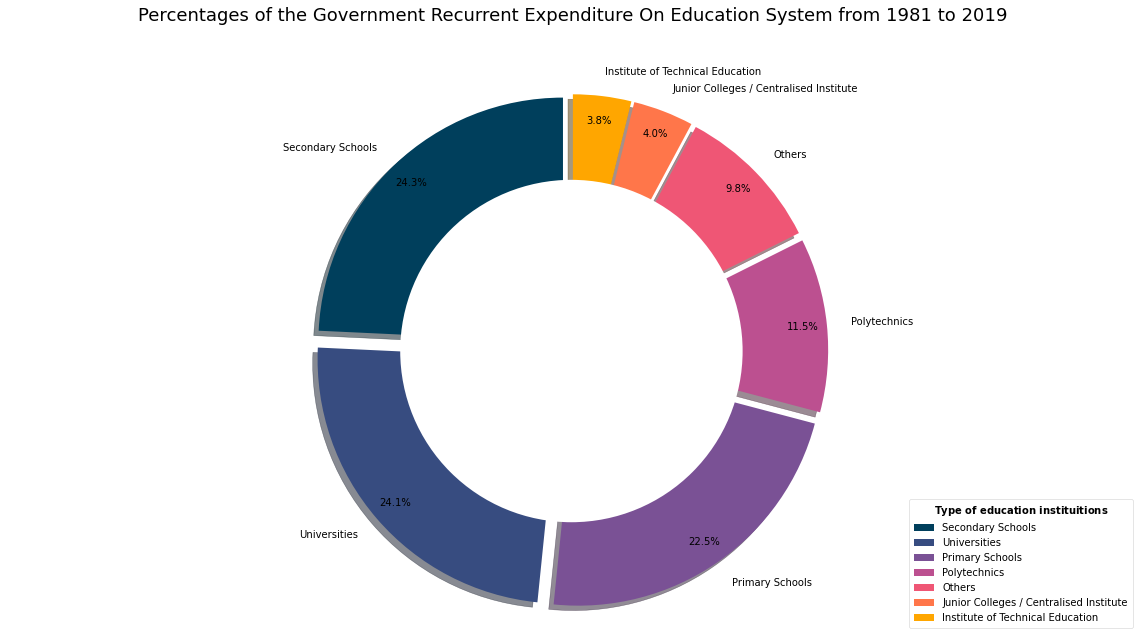

In [16]:
# Pre-processing the data
count = 0
big_container = []
government_recurrent_expenditure_on_education_by_type_cleaned
year_alternator = government_recurrent_expenditure_on_education_by_type_cleaned.index.unique()
instituiton_alternator = government_recurrent_expenditure_on_education_by_type_cleaned['type_of_educational_institutions'].unique()
labels = instituiton_alternator

for item in (instituiton_alternator):
    big_container.append(government_recurrent_expenditure_on_education_by_type_cleaned[government_recurrent_expenditure_on_education_by_type_cleaned['type_of_educational_institutions'] == item]['recurrent_expenditure'].sum())
    count = count + 1

# Plotting
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
colors = ["#003f5c", "#374c80", "#7a5195",
          "#bc5090", "#ef5675", "#ff764a", 
          "#ffa600"]

bbox = {
    "boxstyle": "square,pad=0.3",
    "fc": "white",
    "ec": "dimgrey"
}

# Pre processing data again
temporaryDF = pd.DataFrame({'instituitions': labels, 'totalExpenditure': big_container})
temporaryDF.sort_values(by=['totalExpenditure'], inplace=True, ascending=False)

# Figure 1
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)

    ax.pie(temporaryDF['totalExpenditure'], explode=explode, labels=temporaryDF['instituitions'],
           autopct='%1.1f%%', shadow=True, startangle=90, pctdistance=0.9, colors=colors)
    
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax.axis('equal')
    ax.legend(facecolor='white', framealpha=1, title=r"$\bf{Type \ of \ education \ instituitions}$", loc="lower right", borderpad=0.5)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(r"Percentages of the Government Recurrent Expenditure On Education System from 1981 to 2019", y=1.08, fontsize=18)
    plt.show()

### Insights
- From the donut chart, the government expenditure on secondary school is the highest at 24.3%
- On the other hand, education instituitons such as Institute of technical education (ITE), Junior colleges / centralised institute and others education instituions account only for 17.6% of the govermental expenditure. Hence, recieving the lowest government expenditure.
- The top three education instituitons that accounts for the greatest government expenditure are Secondary Schools (24.3%), universities (24.1%), and primary schools (22.5%). Hence, we can see that the government places a lot of emphasis on primary schools, secondary schools and also univerities.

---



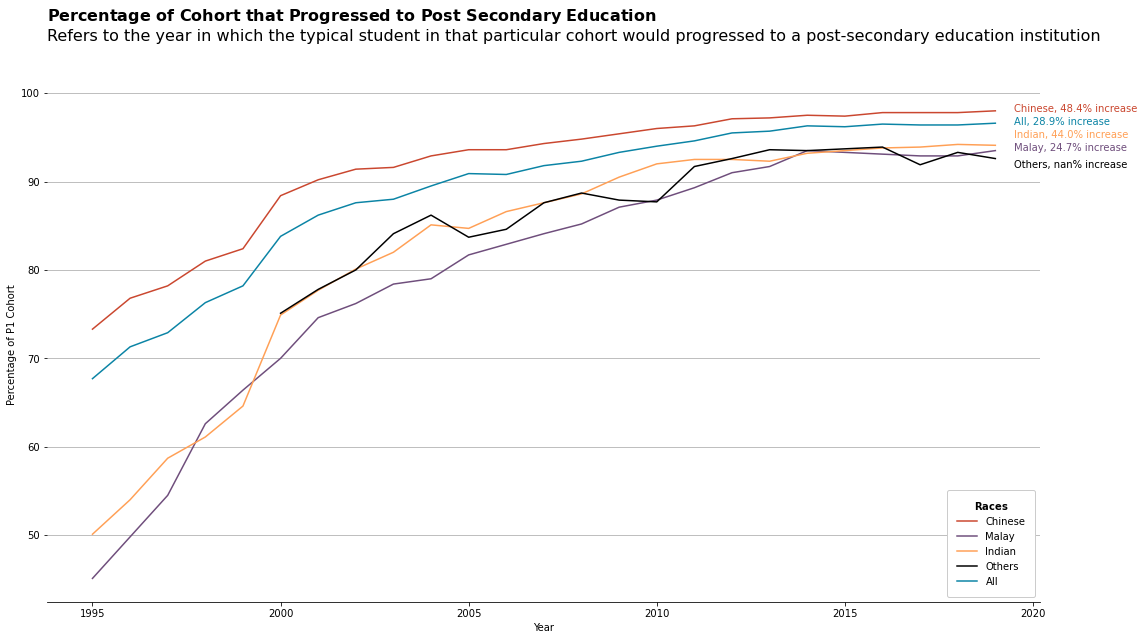

In [17]:
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)

# Pre-processing the data
COP = []
percentage_change = []
year = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['year'].unique()
temporaryDF = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned

special_POS = float(temporaryDF[(temporaryDF['race'] == 'Others') & (temporaryDF['year'] == 1995)]['percentage_p1_cohort_post_sec'])
for item in temporaryDF['race'].unique():
    origin = temporaryDF[(temporaryDF['race'] == item) & (temporaryDF['year'] == 1995)]['percentage_p1_cohort_post_sec']
    current = temporaryDF[(temporaryDF['race'] == item) & (temporaryDF['year'] == 2019)]['percentage_p1_cohort_post_sec']
    change = float(current) - float(origin)
    COP.append(current)
    percentage_change.append(change)

# Plotting
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'Chinese'], x='year', y='percentage_p1_cohort_post_sec', label='Chinese', color="#CA472F")
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'Malay'], x='year', y='percentage_p1_cohort_post_sec', label='Malay', color="#6F4E7C")
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'Indian'], x='year', y='percentage_p1_cohort_post_sec', label='Indian', color="#FFA056")
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'Others'], x='year', y='percentage_p1_cohort_post_sec', label='Others', color="black")
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'All'], x='year', y='percentage_p1_cohort_post_sec', label='All', color="#0B84A5")

# Configurations
sns.despine(left=True)
ax.grid(True, axis="y")
ax.set_title(r"$\bf{Percentage \ of \ Cohort  \ that \ Progressed \ to \ Post \ Secondary\ Education }$" + "\nRefers to the year in which the typical student in that particular cohort would progressed to a post-secondary education institution", loc="left", fontsize=16, y=1.08)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of P1 Cohort")
ax.legend(facecolor='white', framealpha=1, title=r"$\bf{Races}$", loc="lower right", borderpad=1)

# Annotations
POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'Chinese')]['percentage_p1_cohort_post_sec']
ax.annotate(f"Chinese, {percentage_change[0]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS - 0.05), color='#CA472F')

POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'Malay')]['percentage_p1_cohort_post_sec']
ax.annotate(f"Malay, {percentage_change[1]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS - 0.05), color="#6F4E7C")

POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'Indian')]['percentage_p1_cohort_post_sec']
ax.annotate(f"Indian, {percentage_change[2]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS + 0.9), color="#FFA056")

POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'Others')]['percentage_p1_cohort_post_sec']
ax.annotate(f"Others, {percentage_change[3]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS - 1), color="black")

POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'All')]['percentage_p1_cohort_post_sec']
ax.annotate(f"All, {percentage_change[4]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS - 0.18), color="#0B84A5")
plt.show()

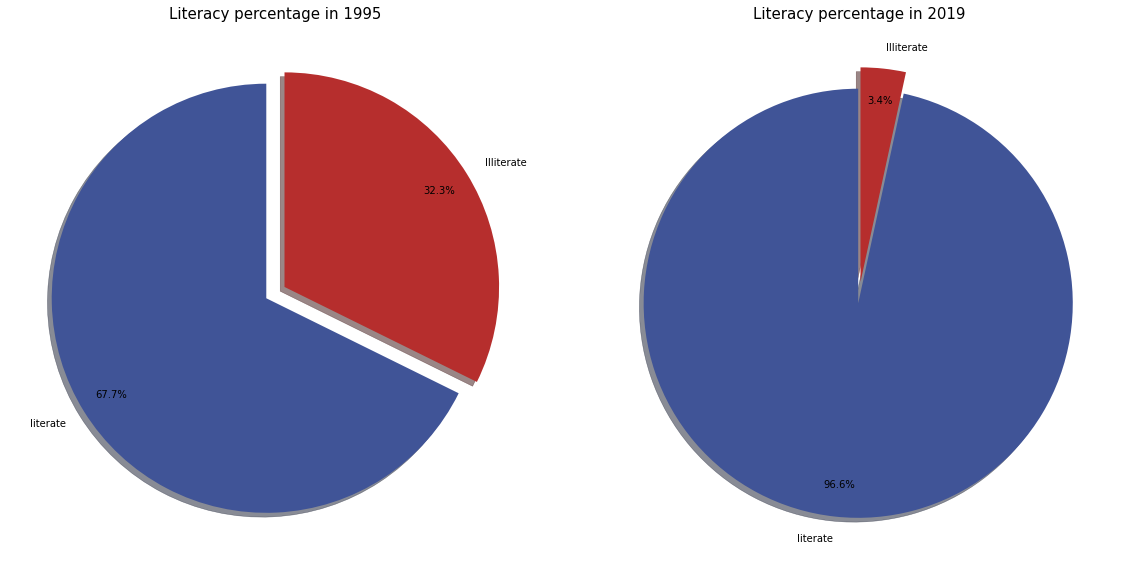

In [18]:
temporaryDF = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned

percentage_of_all_1995 = np.array(temporaryDF[(temporaryDF['race'] == "All") & (temporaryDF['year'] == 1995)]['percentage_p1_cohort_post_sec'])
percentage_of_all_1995_others = 100 - percentage_of_all_1995[0]
piechart_data_1995 = [percentage_of_all_1995[0], percentage_of_all_1995_others]

percentage_of_all_2019 = np.array(temporaryDF[(temporaryDF['race'] == "All") & (temporaryDF['year'] == 2019)]['percentage_p1_cohort_post_sec'])
percentage_of_all_2019_others = 100 - percentage_of_all_2019[0]
piechart_data_2019 = [percentage_of_all_2019[0], percentage_of_all_2019_others]

# Configs
explode = (0.05, 0.05)
colors = ["#405497", "#B62E2D"]
labels = ['literate', 'Illiterate']

bbox = {
    "boxstyle": "square,pad=0.3",
    "fc": "white",
    "ec": "dimgrey"
}

wedgeprops = {'width':0.3, 'edgecolor':'black', 'lw':3}
patches, _ = ax.pie(piechart_data_1995, wedgeprops=wedgeprops, startangle=90, colors=['#405497', 'white'])
patches[1].set_zorder(0)
patches[1].set_edgecolor('white')

# Plotting
with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17.5, 8), tight_layout = True)
    
    ax1.pie(piechart_data_1995, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, pctdistance = 0.85, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
    ax1.set_title("Literacy percentage in 1995", fontsize=15)
    
    ax2.pie(piechart_data_2019, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, pctdistance = 0.85, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
    ax2.set_title("Literacy percentage in 2019", fontsize=15)

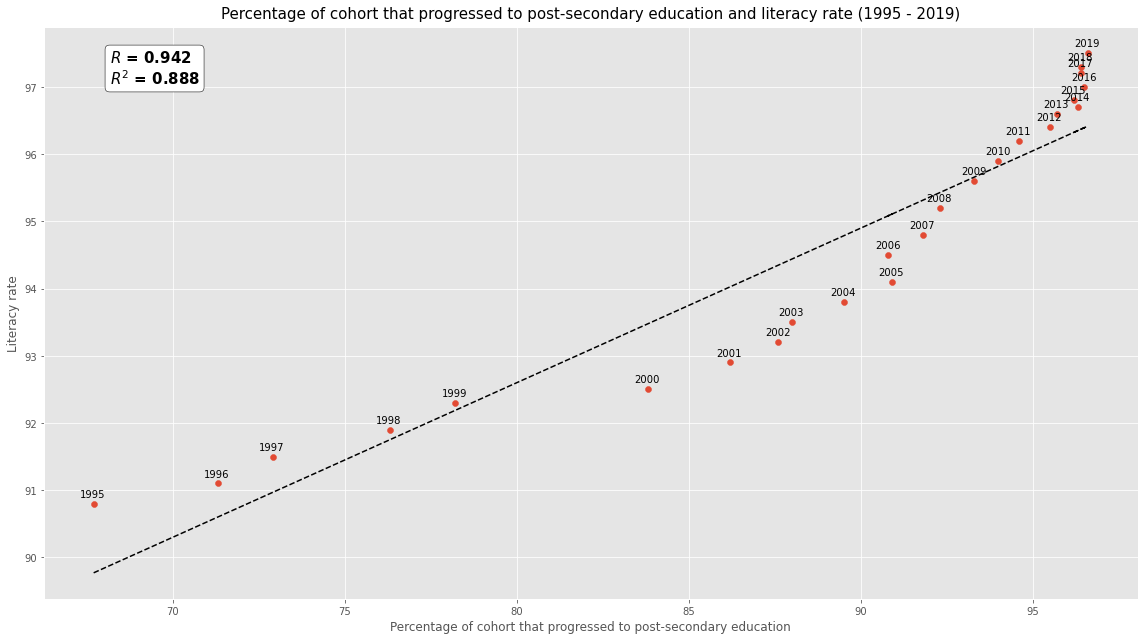

In [19]:
import math
literacy_rate_annual_temporary_df = literacy_rate_annual[(literacy_rate_annual['year'] >=1995) & (literacy_rate_annual['year'] < 2020)]
x = np.array(percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned[percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['race'] == "All"]['percentage_p1_cohort_post_sec'])
y = np.array(literacy_rate_annual_temporary_df['value'])
unique_years = literacy_rate_annual_temporary_df['year'].unique()
z = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned[percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['race'] == "All"]['percentage_p1_cohort_post_sec']
z = np.array(z)

box = {'facecolor': 'white',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }

# Polynomial Regression
def PolyRegress(x_values, y_values):
    my_fitting = np.polyfit(x_values, y_values, 1, full=True)
    coeff = my_fitting[0]

    ### Residual or Sum of Square Error (SSE)
    SSE = my_fitting[1][0]

    ### Determining the Sum of Square Total (SST)
    ## the squared differences between the observed dependent variable and its mean
    diff = y_values - y_values.mean()
    square_diff = diff ** 2
    SST = square_diff.sum()

    ###  Now getting the coefficient of determination (R2)
    R2 = 1 - SSE/SST
    return([math.sqrt(R2),R2])

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)

    # Subplot 1
    ax.scatter(x, y)
    [R1, R2] = PolyRegress(x, y)
    ax.set_ylabel("Literacy rate")
    ax.set_xlabel("Percentage of cohort that progressed to post-secondary education")
    ax.set_title("Percentage of cohort that progressed to post-secondary education and literacy rate (1995 - 2019)", y=1.005, fontsize=15)
    ax.text(0.06, 0.90, f'$R$ = {R1:.3f}\n$R^2$ = {R2:.3f}', fontweight="bold", transform=ax.transAxes, backgroundcolor="white", fontdict={'weight': 'bold', 'size': 15}, bbox= box)
    
    for i, txt in enumerate(unique_years):
        ax.annotate(txt, (x[i] - 0.39, y[i] + 0.1))

    # calc the trendline (it is simply a linear fitting)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x,p(x), linestyle='--', color="black")
    plt.show()

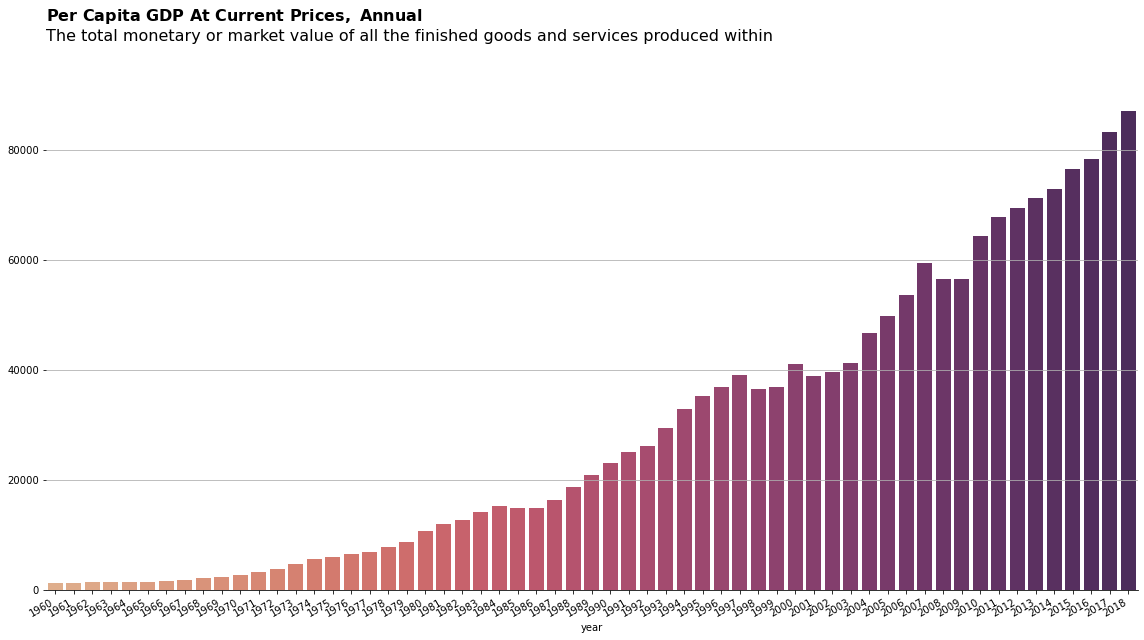

In [20]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

y = np.array(per_capita_gni_and_per_capita_gdp_at_current_prices_annual[(per_capita_gni_and_per_capita_gdp_at_current_prices_annual['level_1'] == "Per Capita GDP")]['value'])
x = np.array(per_capita_gni_and_per_capita_gdp_at_current_prices_annual.index.unique())
dates = per_capita_gni_and_per_capita_gdp_at_current_prices_annual.index.unique()
dates = dates.year

# Plotting
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
ax = sns.barplot(x = dates, y = y, palette= "flare", ax = ax)
sns.despine(left = True)
ax.grid(True, axis="y")  # remove vertical grid lines
ax.set_title(r"$\bf{Per \ Capita\ GDP\ At\ Current\ Prices,\ Annual  }$" + "\nThe total monetary or market value of all the finished goods and services produced within", loc="left", fontsize=16, y=1.08)

## Rotate date labels automatically
fig.autofmt_xdate()

# z = np.polyfit(dates, y, 1)
# p = np.poly1d(z)
# ax.plot(dates,p(dates), linestyle='--', color="black")
plt.show()

In [21]:
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

# set to offline mode to avoid any error
init_notebook_mode(connected=True)

fig = px.bar(temporaryDF, x="year",
             y="percentage_p1_cohort_post_sec", color='race', barmode='group', text='percentage_p1_cohort_post_sec', height=600)
fig.update_xaxes(rangeslider_visible=True)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# embedding into the notebook
iplot({'data': fig})


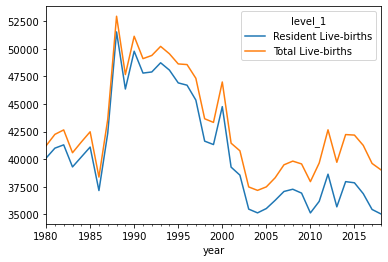

In [22]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
live_birth_cleaned.loc['1980-01-01':].plot()
plt.show()


def cointegration_test(df, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, -1, 5)
    d = {'0.90': 0, '0.95': 1, '0.99': 2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length=6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace, 2), 9),
              ">", adjust(cvt, 8), ' =>  ', trace > cvt)

# cointegration_test(live_birth_cleaned.loc['1980-01-01':])
